# Scraping Facebook

Notebook based off (Mastering Social Media Mining with Python)[https://www.amazon.com/dp/B01BFD2Z2Q/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1]


To get up and running you will need the following:
* Register App -> https://developers.facebook.com/


* Obtain Access Token -> https://developers.facebook.com/tools/explorer
 * select app
 * get user access token
 
Scraping (Packt)[https://www.facebook.com/PacktPub/]

In [1]:
import os
import json
import requests
import facebook

token = 'EAAUhNS05BzAV0M6wuhy3S1DciRSAvaZBx58C7LtSONlV7PM4iQZD'

In [2]:
import dateutil.parser                                                 
from datetime import datetime 
import numpy as np                                                              
import pandas as pd                                                             
import matplotlib.pyplot as plt

In [3]:
graph = facebook.GraphAPI(token)

In [4]:
profile = graph.get_object('me')
profile.keys()

dict_keys(['id', 'bio', 'birthday', 'education', 'email', 'favorite_athletes', 'first_name', 'gender', 'hometown', 'inspirational_people', 'interested_in', 'last_name', 'link', 'location', 'locale', 'name', 'political', 'relationship_status', 'religion', 'quotes', 'timezone', 'updated_time', 'verified'])

In [5]:
print(profile['bio'])
print(profile['birthday'])
print(profile['education'])
print(profile['location'])

отдать свою жизнь служению другим.
donner votre vie au service des autres.
geben, dein Leben dem Dienst an anderen.
تعطي حياتك لخدمة الآخرين
06/16/1995
[{'school': {'id': '111724318846447', 'name': 'Logansport Community High School'}, 'type': 'High School', 'id': '3587917379637'}, {'concentration': [{'id': '109279729089828', 'name': 'Physics'}], 'school': {'id': '103125756394583', 'name': 'Rensselaer Polytechnic Institute'}, 'type': 'College', 'id': '10200191772860074'}]
{'id': '106224666074625', 'name': 'Austin, Texas'}


# Get friends

In [6]:
friends = graph.get_connections(profile["id"], "friends") 
friends

{'data': [], 'summary': {'total_count': 205}}

# Get Posts

In [7]:
all_fields = [   
    'name',
    'message',                                                              
    'created_time',                                                         
    'description',                                                          
    'caption',                                                              
    'link',                                                                 
    'place',                                                                
    'status_type',                                                          
    'message_tags',                                                         
    'picture',                                                              
    'privacy',                                                              
    'properties',                                                           
    'story_tags',                                                           
    'from',                                                                 
    'to',                                                                   
    'with_tags'                                                             
]                                                                           
all_fields = ','.join(all_fields)
posts = graph.get_connections('me', 'posts', fields=all_fields)

for _ in range(1):
    for post in posts['data']:
        print(post, '\n')
            
"""
while True:
    try:
        for post in posts['data']:                                      
            f.write(json.dumps(post)+"\n")
        posts = requests.get(posts['paging']['next']).json()
    except KeyError:
        break
"""

{'name': 'One Piece WP', 'created_time': '2017-07-04T00:54:33+0000', 'description': '😂😂😂 So funny ASL 😂😂', 'link': 'https://www.facebook.com/onepiecewp/videos/1577442568966568/', 'status_type': 'mobile_status_update', 'picture': 'https://scontent.xx.fbcdn.net/v/t15.0-10/s130x130/19782233_1577444935632998_3338559095148904448_n.jpg?oh=27ef57470f8dd9ea89450388e62edbcd&oe=59CC1331', 'privacy': {'value': 'ALL_FRIENDS', 'description': 'Your friends', 'friends': '', 'allow': '', 'deny': ''}, 'story_tags': {'0': [{'id': '10206833380736120', 'name': 'Jorge Alarcon', 'type': 'user', 'offset': 0, 'length': 13}], '21': [{'id': '761084533935713', 'name': 'One Piece WP', 'type': 'page', 'offset': 21, 'length': 12}], '36': [{'id': '1577442568966568', 'name': '', 'offset': 36, 'length': 5}]}, 'from': {'name': 'Jorge Alarcon', 'id': '10206833380736120'}, 'id': '10206833380736120_10213441025123100'} 

{'name': 'PETA (People for the Ethical Treatment of Animals)', 'created_time': '2017-07-04T00:52:34+000

'\nwhile True:\n    try:\n        for post in posts[\'data\']:                                      \n            f.write(json.dumps(post)+"\n")\n        posts = requests.get(posts[\'paging\'][\'next\']).json()\n    except KeyError:\n        break\n'

In [8]:
posts_list = []
posts = graph.get_connections('me', 'posts', fields=all_fields)
for _ in range(10):
    for post in posts['data']:
        created_time = dateutil.parser.parse(post['created_time'])          
        posts_list.append(created_time.strftime('%H:%M:%S'))
    posts = requests.get(posts['paging']['next']).json()

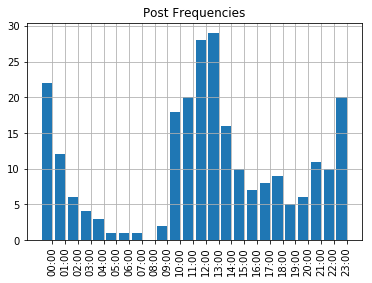

In [9]:
ones = np.ones(len(posts_list))                                              
idx = pd.DatetimeIndex(posts_list)                                                                
my_series = pd.Series(ones, index=idx)

# Resampling into 1-hour buckets                                        
per_hour = my_series.resample('1H').sum().fillna(0)

# Plotting                                                              
fig, ax = plt.subplots()                                                
ax.grid(True)                                                           
ax.set_title("Post Frequencies")                                        
width = 0.8                                                             
ind = np.arange(len(per_hour))                                          
plt.bar(ind, per_hour)                                                  
tick_pos = ind + width / 2                                              
labels = []                                                             
for i in range(24):                                                     
    d = datetime.now().replace(hour=i, minute=0)                        
    labels.append(d.strftime('%H:%M'))                                  
plt.xticks(tick_pos, labels, rotation=90)            
plt.show()

# Pages

In [10]:
page = graph.get_object('PacktPub') 
page.keys()

dict_keys(['id', 'about', 'awards', 'can_post', 'category', 'checkins', 'company_overview', 'cover', 'description', 'founded', 'has_added_app', 'is_community_page', 'is_published', 'likes', 'link', 'mission', 'name', 'name_with_location_descriptor', 'parking', 'products', 'talking_about_count', 'username', 'website', 'were_here_count'])

In [11]:
fields = [                                                                  
    'id',                                                                   
    'name',                                                                 
    'about',                                                                
    'likes',                                                                
    'website',                                                              
    'link'                                                                  
]                                                                           
fields = ','.join(fields)                                                   
                                                                                                                     
page = graph.get_object('PacktPub', fields=fields) 
page

{'about': 'Packt provides software learning resources, from eBooks to video courses, to everyone from web developers to data scientists.',
 'id': '204603129458',
 'likes': 24495,
 'link': 'https://www.facebook.com/PacktPub/',
 'name': 'Packt',
 'website': 'https://www.packtpub.com'}

## Posts

In [12]:
posts = graph.get_connections('PacktPub', 'posts')
type(posts['data'][0])
posts['data'][0].keys()

dict_keys(['id', 'from', 'message', 'picture', 'link', 'name', 'caption', 'description', 'icon', 'actions', 'privacy', 'type', 'status_type', 'application', 'created_time', 'updated_time', 'is_hidden', 'is_expired', 'likes'])

In [13]:
all_fields = [                                                              
    'id',                                                                   
    'message',                                                              
    'created_time',                                                         
    'shares',                                                               
    'likes.summary(true)',                                                  
    'comments.summary(true)'                                                
]                                                                           
all_fields = ','.join(all_fields)                                           
posts = graph.get_connections('PacktPub', 'posts', fields=all_fields)       
                                                                                
downloaded = 0                                                              
while True:  # keep paginating                                              
    if downloaded >= 2:                                                
        break                                                               
    try:                                                                                                             
        for post in posts['data']:                                      
            downloaded += 1                                             
            print(post)                              
            # get next page                                                 
        posts = requests.get(posts['paging']['next']).json()            
    except KeyError:                                                        
        # no more pages, break the loop                                     
        break                                     

{'id': '204603129458_10155546761954459', 'message': 'Long-term knowledge is harder to notice because it’s buried in books rather than blasted in headlines, but its benefits are huge. http://bit.ly/2twN3Fg', 'created_time': '2017-07-04T14:30:02+0000', 'likes': {'data': [{'id': '1562373120500309', 'name': 'Rodrigo Pessolato'}, {'id': '10106843936942352', 'name': 'Matthew Arcuri'}, {'id': '10203369444714355', 'name': 'Josue David Sarabia Cervantes'}, {'id': '10154907435643924', 'name': 'Tarek Omar Hilsaca Benedetto'}, {'id': '858212607659370', 'name': 'Farid Zia Muh'}], 'paging': {'cursors': {'before': 'MTU2MjM3MzEyMDUwMDMwOQZDZD', 'after': 'ODU4MjEyNjA3NjU5Mzcw'}}, 'summary': {'total_count': 5}}, 'comments': {'data': [], 'summary': {'order': 'ranked', 'total_count': 0}}}
{'id': '204603129458_10155546056054459', 'message': "The top 10 frameworks of today's deep learning landscape - their features, benefits, and how they can be of use to you. http://bit.ly/2rXXAoN", 'created_time': '2017-0

In [14]:
posts = graph.get_connections('PacktPub', 'posts') 

for _ in range(2):
    for post in posts['data']:
        print(post)
    posts = requests.get(posts['paging']['next']).json()

{'id': '204603129458_10155546761954459', 'from': {'name': 'Packt', 'category': 'Publisher', 'id': '204603129458'}, 'message': 'Long-term knowledge is harder to notice because it’s buried in books rather than blasted in headlines, but its benefits are huge. http://bit.ly/2twN3Fg', 'picture': 'https://external.xx.fbcdn.net/safe_image.php?d=AQCck8CUbsZHU2sP&w=130&h=130&url=http%3A%2F%2Fwww.collaborativefund.com%2Fuploads%2Ftodd-cravens-101017.jpg&cfs=1&_nc_hash=AQAv8nOVgo6NAsOk', 'link': 'http://www.collaborativefund.com/blog/expiring-vs-lt-knowledge', 'name': 'Expiring vs. Long-Term Knowledge', 'caption': 'http://www.collaborativefund.com/blog/expiring-vs-...', 'description': 'How much of what you read today will you still care about a year from now? 80%? Half? Any of it? ', 'icon': 'https://www.facebook.com/images/icons/post.gif', 'actions': [{'name': 'Comment', 'link': 'https://www.facebook.com/204603129458/posts/10155546761954459'}, {'name': 'Like', 'link': 'https://www.facebook.com/2

In [15]:
posts = graph.get_connections('PacktPub', 'posts')       
                                                                                
downloaded = 0                                                              
while True:  # keep paginating                                              
    if downloaded >= 100:                                                
        break                                                               
    try:                                                                                                             
        for post in posts['data']:                                      
            downloaded += 1       
            
            print(post)
            comments = post['comments']
        
            for comment in comments['data']:
                print('\n\n')
                print(comment, '\n')
            # get next page                                                             
        posts = requests.get(posts['paging']['next']).json()
    except KeyError:                                                        
        # no more pages, break the loop                                     
        break        

{'id': '204603129458_10155546761954459', 'from': {'name': 'Packt', 'category': 'Publisher', 'id': '204603129458'}, 'message': 'Long-term knowledge is harder to notice because it’s buried in books rather than blasted in headlines, but its benefits are huge. http://bit.ly/2twN3Fg', 'picture': 'https://external.xx.fbcdn.net/safe_image.php?d=AQCck8CUbsZHU2sP&w=130&h=130&url=http%3A%2F%2Fwww.collaborativefund.com%2Fuploads%2Ftodd-cravens-101017.jpg&cfs=1&_nc_hash=AQAv8nOVgo6NAsOk', 'link': 'http://www.collaborativefund.com/blog/expiring-vs-lt-knowledge', 'name': 'Expiring vs. Long-Term Knowledge', 'caption': 'http://www.collaborativefund.com/blog/expiring-vs-...', 'description': 'How much of what you read today will you still care about a year from now? 80%? Half? Any of it? ', 'icon': 'https://www.facebook.com/images/icons/post.gif', 'actions': [{'name': 'Comment', 'link': 'https://www.facebook.com/204603129458/posts/10155546761954459'}, {'name': 'Like', 'link': 'https://www.facebook.com/2

In [16]:
someid = '10155520900979459_10155540924134459'
post = graph.get_object(id=someid)
print(post)

{'created_time': '2017-07-03T03:06:39+0000', 'from': {'name': 'Kyle Reese', 'id': '1248433181945610'}, 'message': 'Now that you fixed the web page for the Free Learning eBook of the Day could you please offer the selection from July 1st (Responsive Web Design with HTML5 and CSS3 - Second Edition) again so we can get it?', 'can_remove': False, 'like_count': 4, 'user_likes': False, 'id': '10155520900979459_10155540924134459'}


In [17]:
replies = graph.get_connections(someid, 'comments')
print(replies)

{'data': [{'created_time': '2017-07-03T09:21:55+0000', 'from': {'name': 'Packt', 'category': 'Publisher', 'id': '204603129458'}, 'message': 'Hi Kyle, yes we will be repeating the offer from Saturday, tomorrow. Sorry for the inconvenience!', 'can_remove': False, 'like_count': 3, 'user_likes': False, 'id': '10155520900979459_10155541858539459'}, {'created_time': '2017-07-03T20:14:47+0000', 'from': {'name': 'Kyle Reese', 'id': '1248433181945610'}, 'message': 'Packt Thank you very very much!', 'can_remove': False, 'like_count': 0, 'message_tags': [{'id': '204603129458', 'length': 5, 'name': 'Packt', 'offset': 0, 'type': 'page'}], 'user_likes': False, 'id': '10155520900979459_10155543917579459'}], 'paging': {'cursors': {'before': 'WTI5dGJXVnVkRjlqZAFhKemIzSTZANVEF4TlRVMU5ERTROVGcxTXprME5UazZANVFE1T1RBM016Y3hOUT09', 'after': 'WTI5dGJXVnVkRjlqZAFhKemIzSTZANVEF4TlRVMU5ETTVNVGMxTnprME5UazZANVFE1T1RFeE1qZAzROdz09'}}}


# Top Posts

In [18]:
all_posts = []
all_fields = [                                                              
    'id',                                                                   
    'message',                                                              
    'created_time',                                                         
    'shares',                                                               
    'likes.summary(true)',                                                  
    'comments.summary(true)'                                                
]                                                                           
all_fields = ','.join(all_fields)                                           
posts = graph.get_connections('PacktPub', 'posts', fields=all_fields)
for _ in range(5):
    for post in posts['data']:
        n_likes = post['likes']['summary']['total_count']
        n_comments = post['comments']['summary']['total_count']
        try:                                                                
            n_shares = post['shares']['count']                              
        except KeyError:                                                    
            n_shares = 0
        post['all_interactions'] = n_likes + n_shares + n_comments
        all_posts.append(post)
    posts = requests.get(posts['paging']['next']).json()      

In [19]:
most_liked_all = sorted(all_posts,                                          
                        key=lambda x: x['all_interactions'],                
                        reverse=True)
most_liked = most_liked_all[0]
message = most_liked.get('message', '-empty-')                              
created_at = most_liked['created_time']                                     
n_likes = most_liked['likes']['summary']['total_count']                     
n_comments = most_liked['comments']['summary']['total_count']               
print("Post with most interactions:")                                       
print("Message: {}".format(message))                                        
print("Creation time: {}".format(created_at))                               
print("Likes: {}".format(n_likes))                                          
print("Comments: {}".format(n_comments))
try:                                                                        
    n_shares = most_liked['shares']['count']                                
    print("Shares: {}".format(n_shares))                                    
except KeyError:                                                            
    pass                                                                    
print("Total: {}".format(most_liked['all_interactions']))

Post with most interactions:
Message: 1 year of access to +4,500 tech eBook & video courses for $150. Python, Unity, DevOps, Android, Angular, and more! Go pro with a Mapt Pro annual subscription: http://bit.ly/2svw1nj
Creation time: 2017-06-20T09:38:33+0000
Likes: 677
Comments: 1
Shares: 17
Total: 695


In [20]:
for post in most_liked_all[:10]:                                              
    print("({}) time={}, interactions={}".format(post['id'],               
                                                post['created_time'],     
                                                post['all_interactions']))
    n_likes = post['likes']['summary']['total_count']                     
    n_comments = post['comments']['summary']['total_count']               
    try:                                                                  
        n_shares = post['shares']['count']                                
    except KeyError:                                                      
        n_shares = 0                                                      
    print("({}) time={}, likes={}, shares={}".format(post['id'],           
                                                     post['created_time'], 
                                                     n_likes,              
                                                     n_shares))

(204603129458_10155488680919459) time=2017-06-20T09:38:33+0000, interactions=695
(204603129458_10155488680919459) time=2017-06-20T09:38:33+0000, likes=677, shares=17
(204603129458_10155538859239459) time=2017-07-02T16:30:01+0000, interactions=114
(204603129458_10155538859239459) time=2017-07-02T16:30:01+0000, likes=90, shares=22
(204603129458_10155534198154459) time=2017-07-01T16:30:04+0000, interactions=101
(204603129458_10155534198154459) time=2017-07-01T16:30:04+0000, likes=77, shares=22
(204603129458_10155482490319459) time=2017-06-18T14:30:05+0000, interactions=99
(204603129458_10155482490319459) time=2017-06-18T14:30:05+0000, likes=63, shares=27
(204603129458_10155479337109459) time=2017-06-17T16:30:03+0000, interactions=67
(204603129458_10155479337109459) time=2017-06-17T16:30:03+0000, likes=57, shares=10
(204603129458_10155475813069459) time=2017-06-16T16:30:03+0000, interactions=64
(204603129458_10155475813069459) time=2017-06-16T16:30:03+0000, likes=46, shares=18
(20460312945

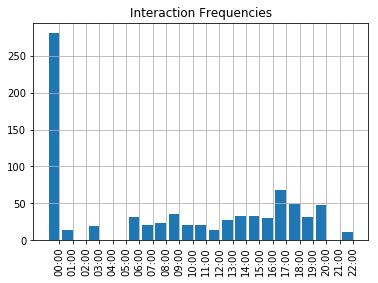

In [21]:
all_posts = []                                                              
n_likes = []                                                                
n_shares = []                                                               
n_comments = []                                                             
n_all = []                                                                  

all_fields = [                                                              
    'id',                                                                   
    'message',                                                              
    'created_time',                                                         
    'shares',                                                               
    'likes.summary(true)',                                                  
    'comments.summary(true)'                                                
]                                                                           
all_fields = ','.join(all_fields)                                           
posts = graph.get_connections('PacktPub', 'posts', fields=all_fields)
for _ in range(30):
    for post in posts['data']:
        created_time = dateutil.parser.parse(post['created_time'])          
        n_likes.append(post['likes']['summary']['total_count'])             
        n_comments.append(post['comments']['summary']['total_count'])       
        try:                                                                
            n_shares.append(post['shares']['count'])                        
        except KeyError:                                                    
            n_shares.append(0)                                              
        n_all.append(n_likes[-1] + n_shares[-1] + n_comments[-1])           
        all_posts.append(created_time.strftime('%H:%M:%S'))
       
    posts = requests.get(posts['paging']['next']).json()      
    
                                                                        
idx = pd.DatetimeIndex(all_posts)                                       
data = {                                                                
    'likes': n_likes,                                                   
    'comments': n_comments,                                             
    'shares': n_shares,                                                 
    'all': n_all                                                        
}                                                                       
my_series = pd.DataFrame(data=data, index=idx)                          
                                                                                
# Resampling into 1-hour buckets                                        
per_hour = my_series.resample('1h').mean().fillna(0)                
                                                                                
# Plotting                                                              
fig, ax = plt.subplots()                                                
ax.grid(True)                                                           
ax.set_title("Interaction Frequencies")                                 
width = 0.8                                                             
ind = np.arange(len(per_hour['all']))                                   
plt.bar(ind, per_hour['all'])                                           
tick_pos = ind + width / 2                                              
labels = []                                                             
for i in range(24):                                                     
    d = datetime.now().replace(hour=i, minute=0)                        
    labels.append(d.strftime('%H:%M'))                                  
plt.xticks(tick_pos, labels, rotation=90)
plt.show()

In [33]:
from nltk.corpus import stopwords                                               
from wordcloud import WordCloud

all_posts = []              
all_fields = [                                                              
    'id',                                                                   
    'message',                                                              
    'created_time',                                                         
    'shares',                                                               
    'likes.summary(true)',                                                  
    'comments.summary(true)'                                                
]                                                                           
all_fields = ','.join(all_fields)                                           
posts = graph.get_connections('PacktPub', 'posts', fields=all_fields)
for _ in range(30):
    for post in posts['data']:
        all_posts.append(post.get('message', ''))
       
    posts = requests.get(posts['paging']['next']).json()  

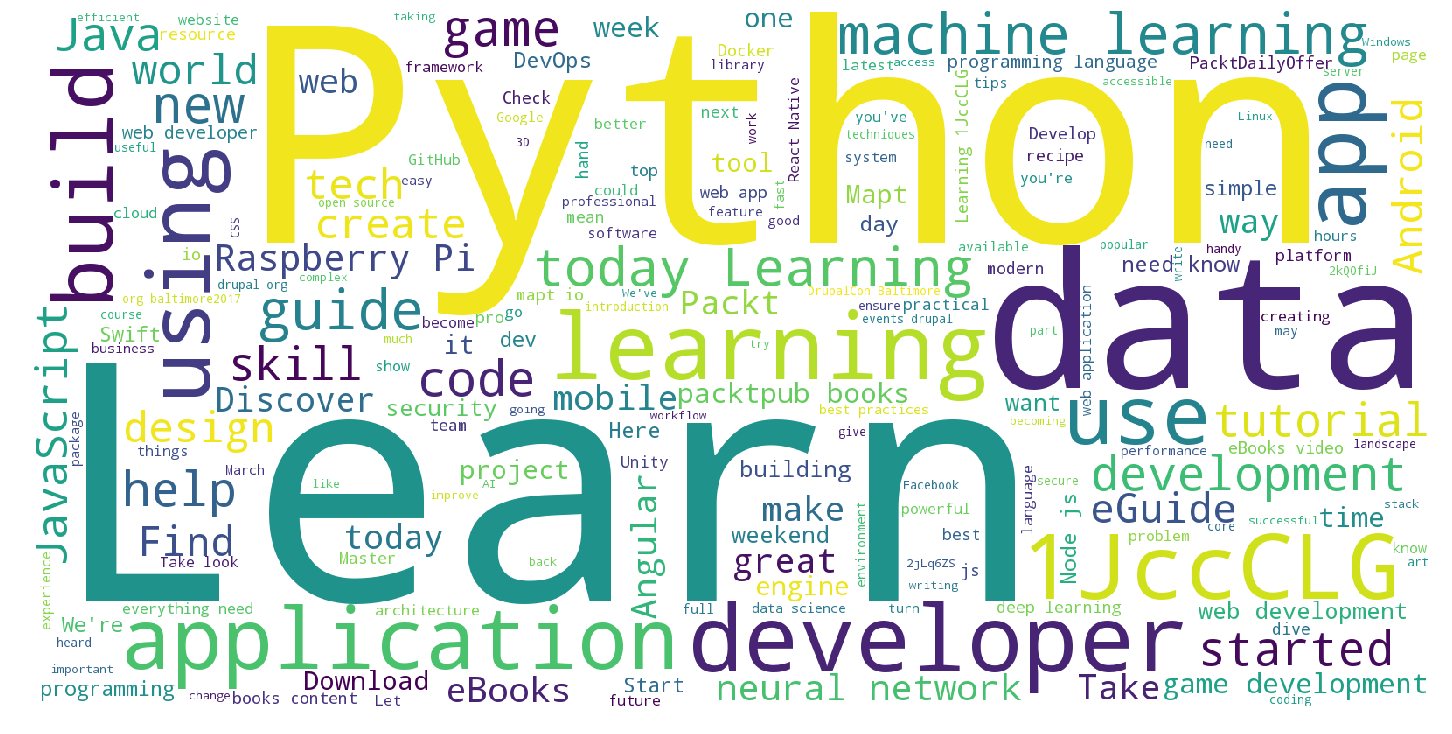

In [48]:
text = ' '.join(all_posts)                                                  
stop_list = ['save', 'free', 'today', 'get', 'title', 'titles', 'bit', 'ly', 'eBook', 'http', 'https', 'www', 'com']
stop_list.extend(stopwords.words('english'))                                
wordcloud = WordCloud(background_color='white', width=1600, height=800, stopwords=stop_list).generate(text)  

plt.figure(figsize=(20,10), facecolor='w')
plt.imshow(wordcloud)                                                       
plt.axis("off")  
plt.tight_layout(pad=0)
plt.show()